# RMS to interval velocity problem 

Forward mapping 

![](equation1.png)


- $v_int$: interval velocity
- $V_{rms}$: rms velocity 
- $w$:

inverse mapping 

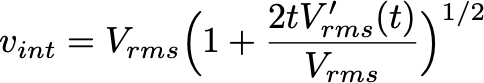

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## define interval velocity 

$$v_{int} = v_0 + a \sin(2\pi f t)$$

$$or$$

$$v_{int} = v_0 + a \sin w$$

In [52]:
def interval_velocity_analytic(time, velocity0, amplitude, frequency, beta, beta0, omega): 
    """
    define our interval velocity as a harmonic function with amplitude (a), frequency (f), and base-value v0
    """
    #return velocity0 + amplitude *np.sin(omega*time) + beta * time
    return velocity0 + amplitude *np.sin(2*np.pi*frequency*time) + beta * time # this is how the eq was defined in class

- $B$: represents a constant rate of change of the interval velocity with respect to time.
- $w$: Omega is how fast the velocity is oscillating, back and forth. It determines the rate at which the sine wave, completes its Cycles.

In [76]:
a = 50
v0 = 2000
b = 20
b0 = 0
f = 2
#check how limitate b to 0s ≤ t ≤ 2s
#check if frequency should be 2

In [78]:
n_times = 200 
max_time = 2
time = np.linspace(0, 2, n_times)
w = (2*np.pi*f*time)

In [77]:
# vint = interval_velocity_analytic(time, v0, a, b, w)
vint = interval_velocity_analytic(time=time, velocity0=v0, amplitude=a, frequency=f, beta=b, beta0=b0, omega=w)

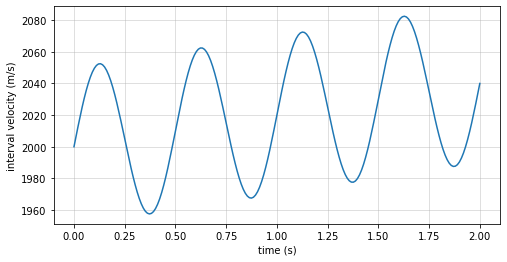

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4)) 

ax.plot(time, vint)
ax.set_xlabel("time (s)")
ax.set_ylabel("interval velocity (m/s)")
ax.grid(alpha=0.5)

# forward problem 

$$V_{rms}^2 (t) = \frac{1}{t}\int_0^{t_{max}} v_{int}^2(u) du$$

with 
- $v_{int} = v_0 + a \sin(2\pi f t)$
- $v_{int} = v_0 + a \sin(\omega t)$

ChatGPT
integrate (v + a sin ⁡ ( ω t ) + B t )^2 from 0 to t

[image.png](attachment:chatgpt.png)


In [80]:
def rms_velocity_analytic(time, velocity0, amplitude, frequency, beta): 
    omega = 2*np.pi*frequency

    inds_nonzero = time > 0 # in practice, you might want to pick a small number
    vrms2 = np.zeros_like(time) 
       
    vrms2[inds_nonzero] = 1/time[inds_nonzero] * (
        (
            velocity0**2 * time[inds_nonzero] - ((2 * velocity0 * amplitude) / omega) * np.cos(omega * time[inds_nonzero]) -1) + velocity0 * beta *  time[inds_nonzero]**2  + (amplitude**2/2) * time[inds_nonzero]
            - (amplitude**2/4 * omega) * np.sin(2* omega * time[inds_nonzero]) - ((2* amplitude * beta * time[inds_nonzero] * (np.cos(omega * time[inds_nonzero])/ omega)) + ((2* amplitude * beta * (np.sin(omega * time[inds_nonzero]))/ omega**2)) +
            ((beta**2 * time[inds_nonzero]**3)/3)
        )
    )
    
    vrms = np.sqrt(vrms2)
    vrms[~inds_nonzero] = velocity0
    return vrms

Text(0, 0.5, 'RMS Velocity (m/s)')

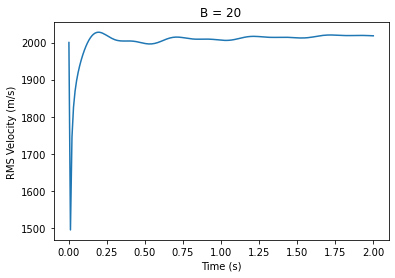

In [81]:
fig, ax = plt.subplots(1,1)

rms_velocity = rms_velocity_analytic(time, v0, a, f, b)

plt.plot(time, rms_velocity)

plt.title("B = 20")
plt.xlabel("Time (s)")
plt.ylabel("RMS Velocity (m/s)")

In [ ]:
def rms_velocity_analytic(time, velocity0, amplitude, frequency, beta0): 
    omega = 2*np.pi*frequency

    inds_nonzero = time > 0 # in practice, you might want to pick a small number
    vrms2 = np.zeros_like(time) 
       
    vrms2[inds_nonzero] = 1/time[inds_nonzero] * (
        (
            velocity0**2 * time[inds_nonzero] - ((2 * velocity0 * amplitude) / omega) * np.cos(omega * time[inds_nonzero]) -1) + velocity0 * beta0 *  time[inds_nonzero]**2  + (amplitude**2/2) * time[inds_nonzero]
            - (amplitude**2/4 * omega) * np.sin(2* omega * time[inds_nonzero]) - ((2* amplitude * beta0 * time[inds_nonzero] * (np.cos(omega * time[inds_nonzero])/ omega)) + ((2* amplitude * beta0 * (np.sin(omega * time[inds_nonzero]))/ omega**2)) +
            ((beta0**2 * time[inds_nonzero]**3)/3)
        )
    )
    
    vrms = np.sqrt(vrms2)
    vrms[~inds_nonzero] = velocity0
    return vrms

Text(0, 0.5, 'RMS Velocity (m/s)')

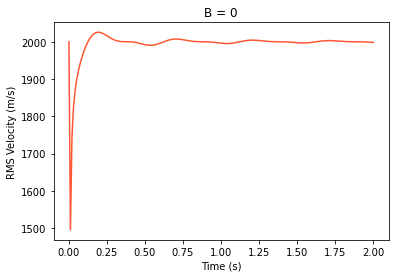

In [65]:
fig, ax = plt.subplots(1,1)

rms_velocity = rms_velocity_analytic(time, v0, a, f, b0)

plt.plot(time, rms_velocity, color="#FF5733")

plt.title("B = 0")
plt.xlabel("Time (s)")
plt.ylabel("RMS Velocity (m/s)")

# estimate vint from vrms2

$$v_{int} = V_{RMS} \left(1 + \frac{2 t V'_{RMS}}{V_{RMS}}\right)^{1/2}$$

In [72]:
dt = np.diff(time)
vrms = rms_velocity_analytic(time, v0, a, f, b)

In [73]:
dvdt_approx = np.diff(vrms) / dt
dvdt_approx = np.r_[0, dvdt_approx]  # forward difference

In [74]:
vint_rec = vrms * np.sqrt(
    1 + (2 * time * dvdt_approx)/vrms
)

Text(0, 0.5, '$v{int}$ (m/s)')

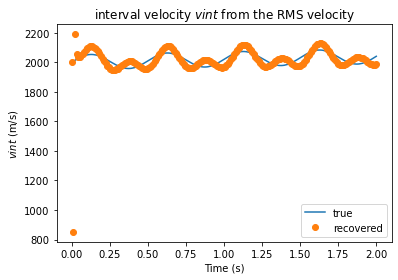

In [84]:
fig, ax = plt.subplots(1,1)

ax.plot(time, vint, label="true")
ax.plot(time, vint_rec, "o", label="recovered")
ax.legend()
plt.title("interval velocity $v{int}$ from the RMS velocity")
plt.xlabel("Time (s)")
plt.ylabel("$v{int}$ (m/s)")